In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [5]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [6]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [7]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [8]:
W = eval_model(X, y, iterations=1000, alpha=1e-4)

C:\Users\snboyarskiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\snboyarskiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


100 [ 0.49569799 -0.14048662  0.04069727  1.52293291] 2.2051992281076105
200 [ 0.4952624  -0.14104266  0.03953468  1.52387009] 4.407505180392993
300 [ 0.49482504 -0.14159407  0.04064543  1.52481037] 2.1807822454051258
400 [ 0.49438072 -0.14216321  0.03313593  1.52573506] 1.1533111661400692
500 [ 0.49394752 -0.14271081  0.03610838  1.52667947] 1.366889030813768
600 [ 0.4935219  -0.14325563  0.04078024  1.52762894] 2.2488107864163127
700 [ 0.493086   -0.14381218  0.03948909  1.52856589] 1.8272930372476694
800 [ 0.49265074 -0.14436267  0.04116366  1.52950772] 2.583093060042983
900 [ 0.4922001  -0.14492931  0.03460672  1.53043192] 1.247358495499535
1000 [ 0.49177244 -0.14547201  0.04007379  1.5313819 ] 4.05849287640886


2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [9]:
def log_loss(w, X, y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X))   
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

In [10]:
def optimize(w, X, y, n_iterations, eta):
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

In [11]:
n_iterations = 1000
eta = 0.05

In [12]:
w, losses = optimize(W, X_st, y, n_iterations, eta)
w

array([-1.68155984, -0.92055831,  0.88449968,  2.49956891])

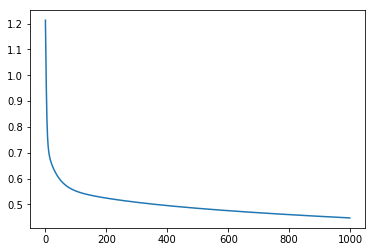

In [13]:
plt.plot(range(len(losses)), losses)

 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [14]:
def calc_pred_proba(W, X):  
    w = W.reshape(X.shape[0], 1)
    return sigmoid(np.dot(w.T, X))

In [15]:
pw = calc_pred_proba(W, X_st)
pw

array([[0.8627625 , 0.86470786, 0.96249293, 0.8637381 , 0.95919838,
        0.88170663, 0.98789486, 0.97624471, 0.8622725 , 0.96323171]])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [16]:
def calc_pred(W, X):
    m = X.shape[1]
    y_predicted = np.zeros((1, m))
    A = calc_pred_proba(W, X)
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5):
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    return y_predicted

In [17]:
calc_pred(W, X_st)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.